In [1]:
!pip install pillow
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from pandas import Series, DataFrame
import statsmodels.api as sm
import pandas as pd
import nltk
import operator
import re,string
from patsy import dmatrices
%pylab inline
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
stop = set(stopwords.words('english'))
punc = string.punctuation    

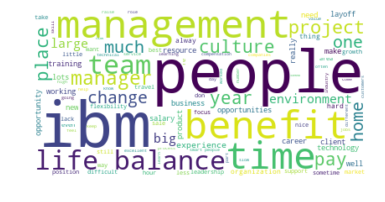

In [11]:
#IBM WordCloud
ibm = pd.read_csv('ibm.csv')

ibm['Reviews'] = ibm['Pros'] + ibm['Cons']
# clean punctuation and white spaces of both pro and cons
ibm['Reviews'] = ibm['Reviews'].apply(lambda x:re.sub(r'[^\w\s]', ' ', str(x).lower()))
ibm['Reviews'] = ibm['Reviews'].apply(lambda x:re.sub(r'(\\n+)', ' ', x))

reviews = str(ibm['Reviews'].sum())
#d = getcwd()
#mask = np.array(Image.open(path.join(d, "apple-logo.jpg")))
stop = set(STOPWORDS)
stop.update(['work','job','employee','customer', 'company','good','employees','lot','many','great','will'])
wordcloud = WordCloud(stopwords=stop, max_font_size=75, max_words=100, background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#convert to file
wordcloud.to_file("apple.png")